In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/lab_blood.csv')
display(df)

,LABRESULT,ABOGROUP
0,11.8,9.0
1,11.8,9.0
2,11.8,9.0
3,11.8,9.0
4,11.8,9.0
...,...,...
111753,8.9,9.0
111754,8.9,9.0
111755,6.6,9.0
111756,6.6,9.0


In [35]:
df_cleaned = df[(df.ABOGROUP.notnull()) & (df.ABOGROUP != 9) & (df.ABOGROUP != np.nan)].reset_index(drop=True)
blood_code = {1.0:'A', 2.0:'B', 3:'AB', 4:'O'}
df_cleaned['ABOGROUP'] = df_cleaned['ABOGROUP'].map(blood_code)
df_cleaned

,LABRESULT,ABOGROUP
0,6.20,O
1,7.50,O
2,8.80,O
3,7.13,O
4,8.78,O
...,...,...
24766,5.90,A
24767,5.90,A
24768,0.00,B
24769,6.30,A


In [37]:
count_df = df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)].groupby('ABOGROUP')['LABRESULT'].count().reset_index()
count_df.columns = ['Blood Group', 'Count']
display(count_df)

,Blood Group,Count
0,A,2876
1,AB,1231
2,B,4761
3,O,15682


In [46]:
grouped_df = df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)].groupby('ABOGROUP').agg(np.mean)['LABRESULT'].reset_index()
grouped_df.columns = ['Blood Group', 'HbA1C (mean)']
display(grouped_df)

,Blood Group,HbA1C (mean)
0,A,7.420073
1,AB,7.333517
2,B,7.556730
3,O,7.453406


In [47]:
join_df = count_df.merge(grouped_df, on='Blood Group', how='inner')
display(join_df)

,Blood Group,Count,HbA1C (mean)
0,A,2876,7.420073
1,AB,1231,7.333517
2,B,4761,7.556730
3,O,15682,7.453406


Text(0, 0.5, 'HbA1C level')

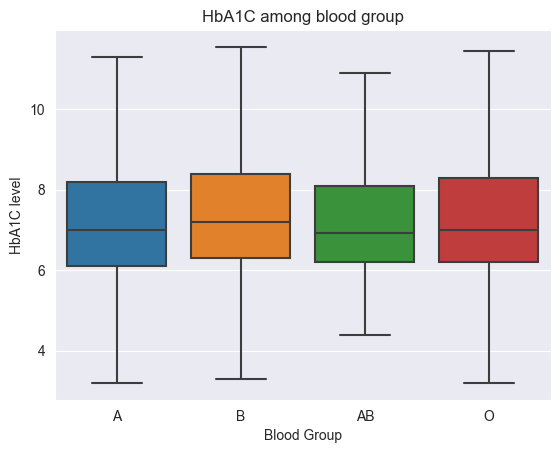

In [48]:
sns.set_style('darkgrid')
sns.boxplot(data=df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)], x='ABOGROUP', y='LABRESULT', showfliers=False, order=['A','B','AB','O'])
plt.title("HbA1C among blood group")
plt.xlabel("Blood Group")
plt.ylabel("HbA1C level")

In [8]:
import pingouin as pg

# Perform multi-way ANOVA
aov = pg.anova(data=df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)], dv='LABRESULT', between=['ABOGROUP'])

# Print the ANOVA results
print(aov)

     Source  ddof1  ddof2        F     p-unc       np2
0  ABOGROUP      3  24594  6.74575  0.000152  0.000822


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
LABRESULT,0.915238,0.0,False


<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

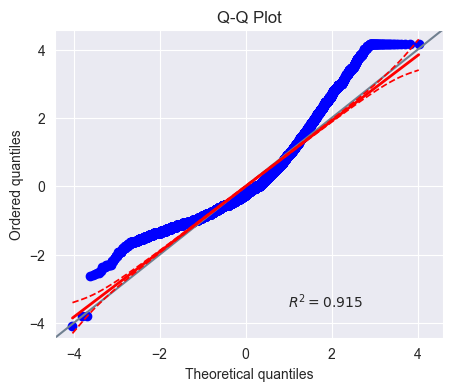

In [49]:
normality = pg.normality(df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)]['LABRESULT'])

# Print the normality test results
display(normality)
pg.qqplot(df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)]['LABRESULT'])

In [15]:
kruskal = pg.kruskal(data=df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)], dv='LABRESULT', between='ABOGROUP')

# Print the Kruskal-Wallis test results
print(kruskal)

           Source  ddof1          H         p-unc
Kruskal  ABOGROUP      3  32.382911  4.345874e-07


In [17]:
# Perform multiple comparisons between ABOGROUP levels
gameshowell = pg.pairwise_gameshowell(data=df_cleaned[(df_cleaned.LABRESULT <= 15) & (df_cleaned.LABRESULT > 0)], dv='LABRESULT', between='ABOGROUP')

# Print the multiple comparisons results
display(gameshowell)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,AB,7.420073,7.333517,0.086556,0.059533,1.453919,2523.690322,0.465791,0.049511
1,A,B,7.420073,7.556730,-0.136657,0.043293,-3.156535,5906.670297,0.008717,-0.074539
2,A,O,7.420073,7.453406,-0.033333,0.037490,-0.889127,3941.765562,0.810527,-0.018035
3,AB,B,7.333517,7.556730,-0.223212,0.054994,-4.058813,1999.261966,0.000299,-0.129763
4,AB,O,7.333517,7.453406,-0.119889,0.050553,-2.371557,1457.315697,0.083063,-0.070193
5,B,O,7.556730,7.453406,0.103323,0.029762,3.471665,7913.903087,0.002923,0.057444
